In [1]:
%run setup.ipynb

In [2]:
path = "Datasets/"

In [3]:
df_Q1 = pd.read_csv(path + "df_Q1.csv")
df_Q2 = pd.read_csv(path + "df_Q2.csv")
df_Q3 = pd.read_csv(path + "df_Q3.csv")
df_Q4 = pd.read_csv(path + "df_Q4.csv")

In [4]:
# cartella dove ci sono i dati da analizzare
folder = "setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [5]:
df_merge = df_all[["worker_id","doc_id","doc_fact_check_ground_truth_label","doc_fact_check_ground_truth_value","sovra","quartile","doc_truthfulness_value","mean"]]

In [6]:
df_Q1 = df_Q1[["worker_id","doc_id",
               ## 1 gruppo
               "age_ans_index", 
                "school_ans_index", 
                "taxes_ans_index", 
                "political_views_ans_index", 
                "consideration_ans_index", 
                "southern_border_ans_index",
                ## 2 gruppo 
                "s_info_1_ans_index",
                "s_info_3_v2_ans_index",
                "s_info_4_ans_index",
                "s_info_5_ans_index",
                "s_info_6_ans_index",
                "s_info_7_ans_index",
                "s_com_1_v2_ans_index",
                "s_com_2_ans_index",
                ## 3 gruppo
                "k_info_1_ans_index",
                "k_info_2_ans_index",
                "k_info_3_ans_index",
                "k_crea_2_ans_index",
                "k_ai_2_ans_index",
                 "k_ai_4_ans_index" ]]

In [7]:
df_merge = df_merge.merge(df_Q1, on=["worker_id","doc_id"], how="left")

In [8]:
df_Q2 = df_Q2[["worker_id","doc_id",
               "doc_index","doc_speaker_party","doc_statement_date",
               "numero_parole_frase","numero_parole_significative","percentuale_parole_significative","fre","sentiment","subjectivity"]]
               

In [9]:
df_merge = df_merge.merge(df_Q2, on=["worker_id","doc_id"], how="left")

In [10]:
df_Q3 = df_Q3[["worker_id","doc_id",
               "doc_completeness_index",
               "doc_comprehensibility_index",
               "doc_precision_index",
               "doc_informativeness_index",
               "doc_unbiasedness_index",
               "doc_accuracy_index",
               "doc_speaker's-trustworthiness_index",
               "doc_confidence_index",
               "doc_time_elapsed"
               ]]
               

In [11]:
df_merge = df_merge.merge(df_Q3, on=["worker_id", "doc_id"], how="left")

In [12]:
df_Q4 = df_Q4[["worker_id","doc_id",
               "query_amount_per_doc", 
                            "response_position",
                            "selected_amount_per_doc","sim_statem_query","sim_statem_resname","sim_statem_ressnip"
                ]]

In [13]:
df_merge = df_merge.merge(df_Q4, on=["worker_id", "doc_id"], how="left")

## Analisi di correlazione

In [14]:
df = df_merge.copy()

In [15]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
from scipy import stats

In [16]:
def crea_heatmap(df,metodo,significativo,dimensione = None,valore = None):

    if dimensione == None:
        data = df
    else:
        data = df[df[dimensione] == valore]
    
    correlation_table = data.corr(method=metodo)
    correlation_table = correlation_table.round(2)

    for col in correlation_table.columns:
        c = correlation_table[col]
        
        i = 0
        for index in c.index:
            if index == col:
                start = i
            i = i+1
        c = c[(start+1):(i-1)]
        c
        
        mantain = False
        
        
        for val in c:
            if val > significativo:
                mantain = True
        if mantain == False:
            correlation_table = correlation_table.drop(columns=[col])
            correlation_table = correlation_table.drop(index=[col])
            
    mp.figure(figsize=(10,10))

    # creating mask
    mask = np.triu(np.ones_like(correlation_table))

    # label
    label = correlation_table.applymap(lambda v: str(v) if v >= significativo*0.8 else '')
    
    # Create data labels, using blank string if under threshold value
    #M = correlation_table.iloc[0.3,1].values.max()
    #labels = correlation_table.iloc[0.3,1].applymap(lambda v: str(v) if v == M else '')
#
    # plotting a triangle correlation heatmap
    sns.heatmap(correlation_table, cmap="coolwarm", annot=label,mask = mask,linewidth=1, linecolor='w',annot_kws={'fontsize':8}, fmt='',square=True,cbar_kws={"shrink": .5}) 
    # sns.heatmap(correlation_table, cmap=color_table, annot=label,mask = mask,linewidth=1, linecolor='w',annot_kws={'fontsize':10}, fmt='') 
    
    if dimensione != None:
        mp.title("Heatmap -- " + metodo + " " + valore, fontsize = 20, loc="center")
    else:
        mp.title("Heatmap -- " + metodo, fontsize = 20, loc="center")
    # displaying heatmap
    mp.show()

In [17]:
metodi = ["kendall","spearman"]
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]
sovra = ["true","pants-on-fire"]

In [18]:
'''

for metodo in metodi:
    for quartile in quartili:
            crea_heatmap(df,metodo,"quartile",quartile,0.3)
            '''

'\n\nfor metodo in metodi:\n    for quartile in quartili:\n            crea_heatmap(df,metodo,"quartile",quartile,0.3)\n            '

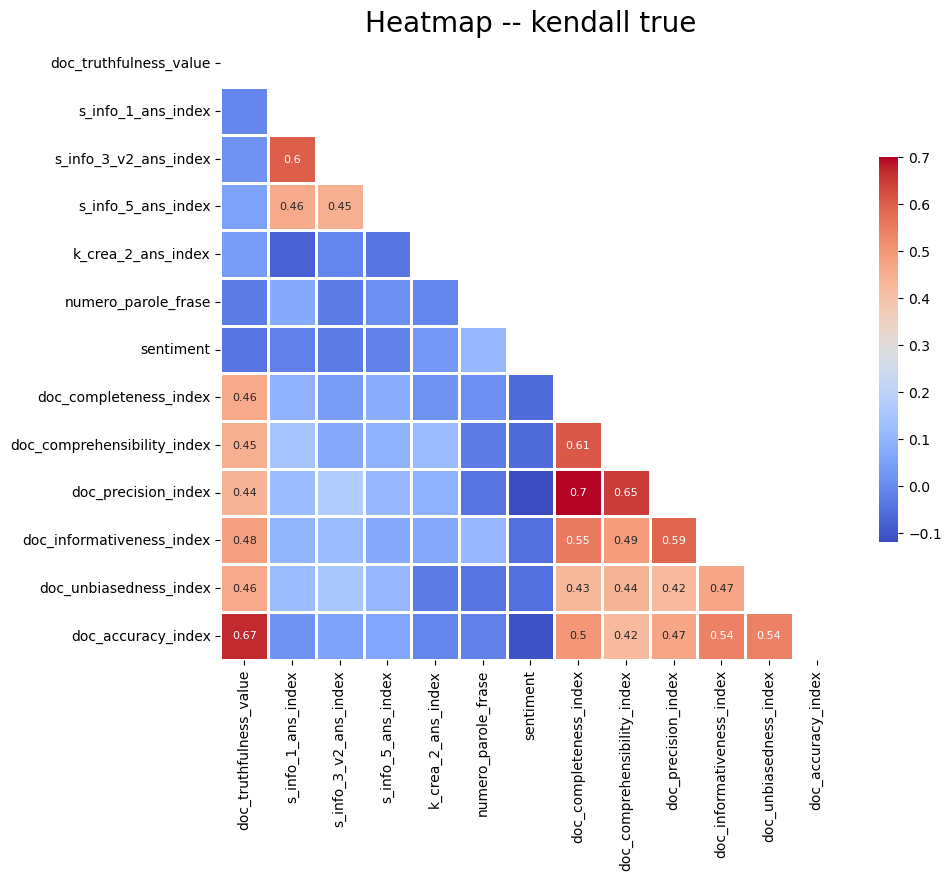

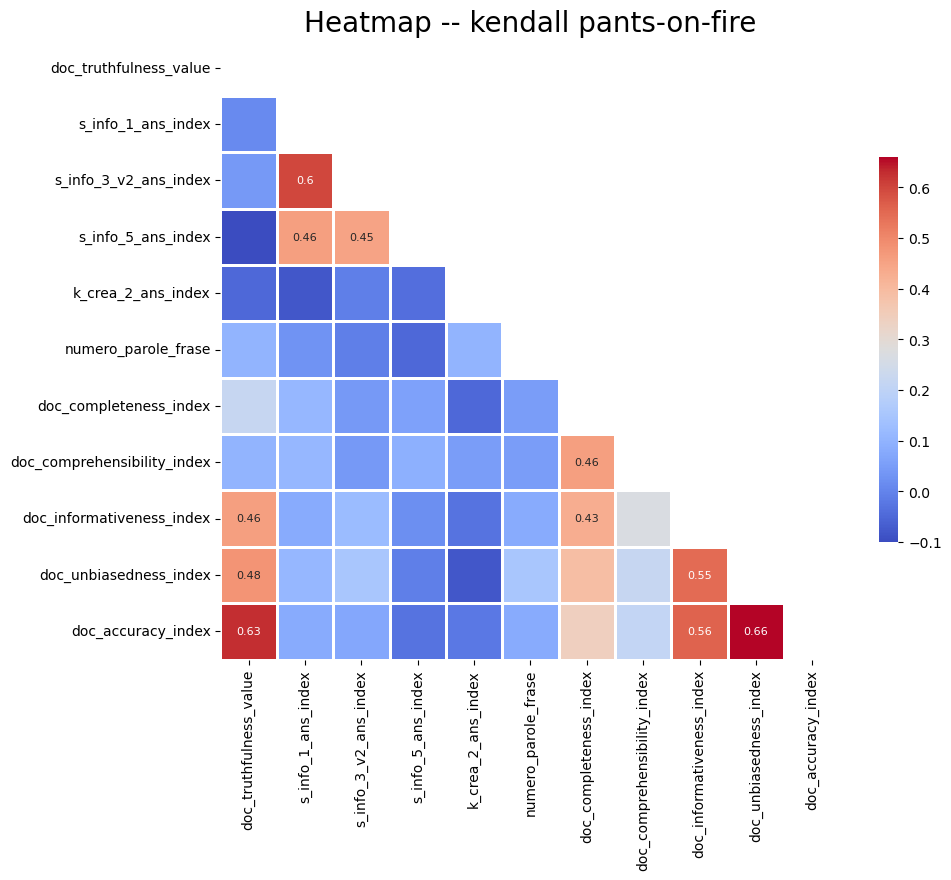

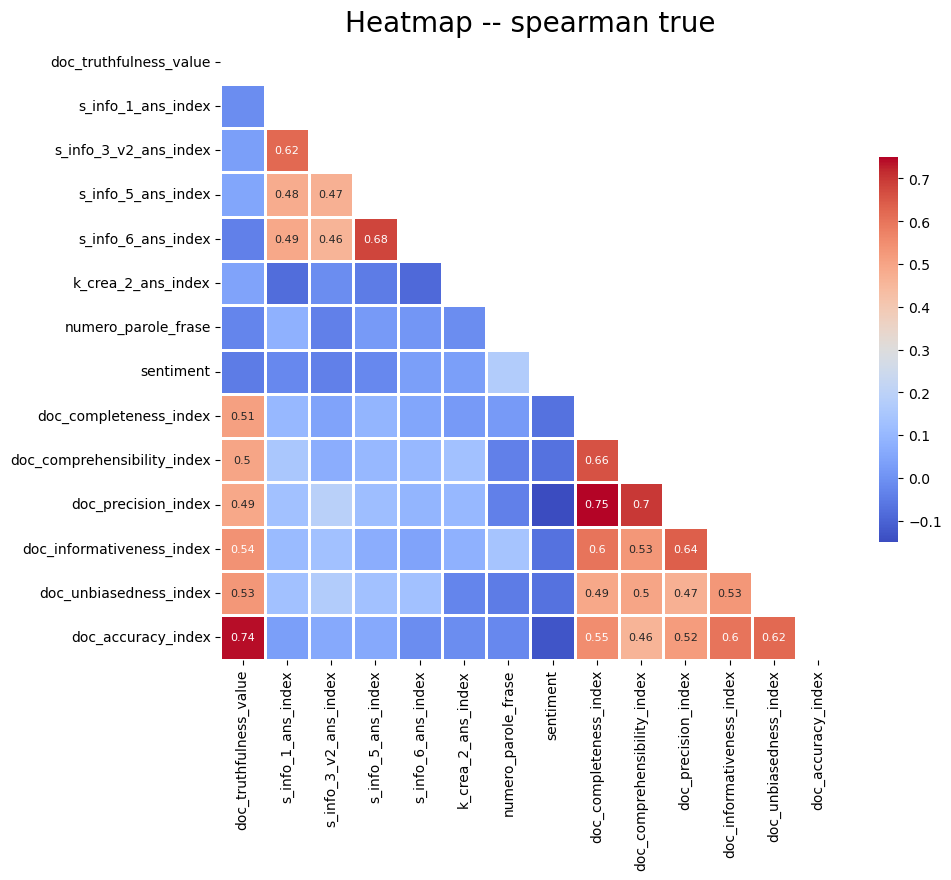

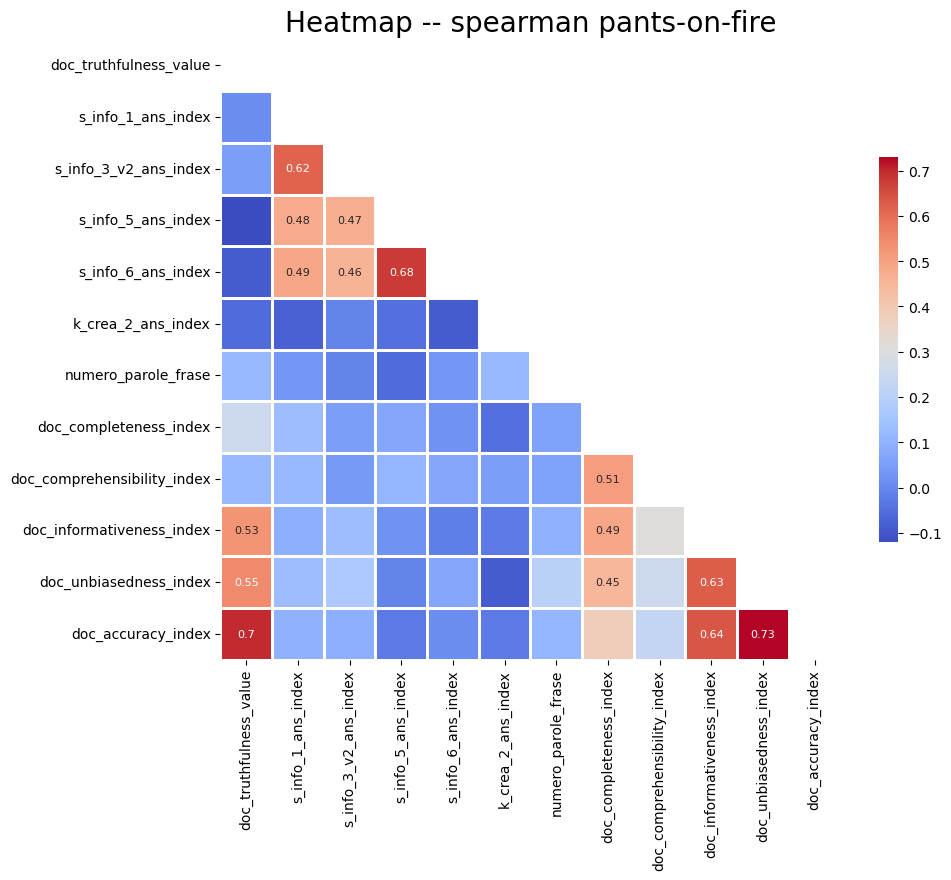

In [19]:
for metodo in metodi:
    for val in ["true","pants-on-fire"]:
            crea_heatmap(df,metodo,0.5,"sovra",val)

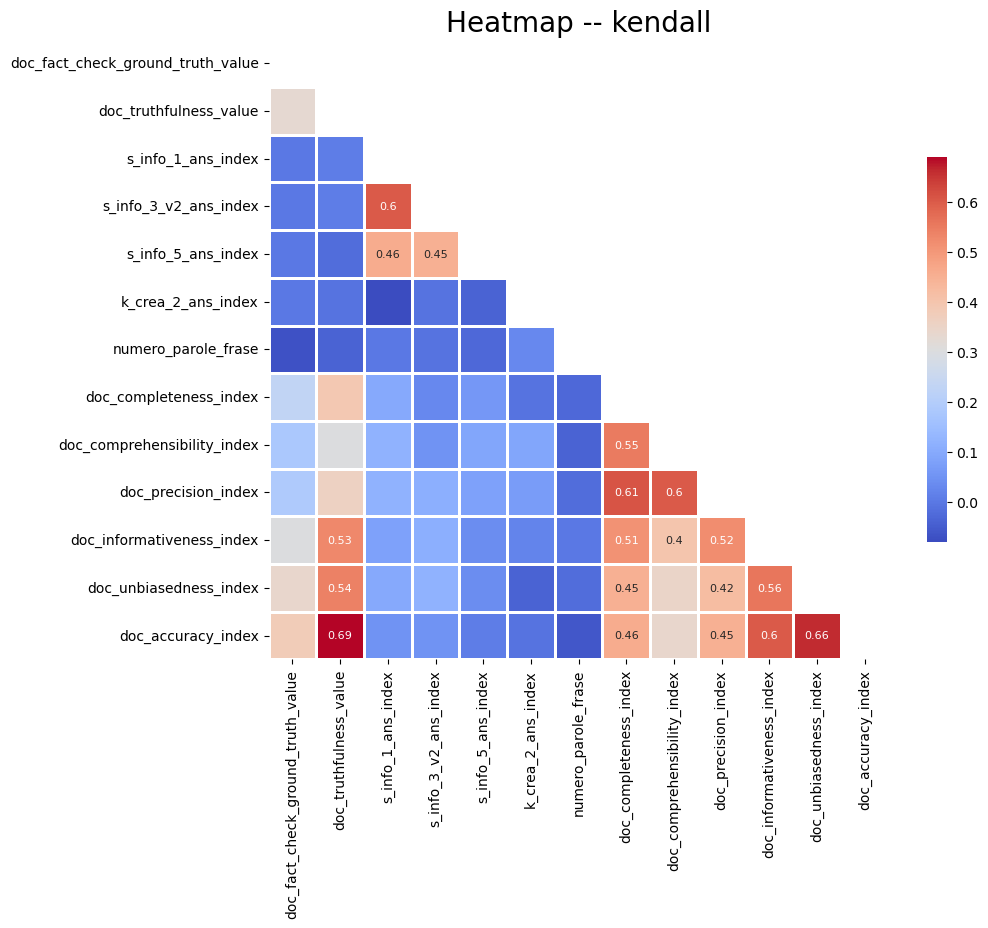

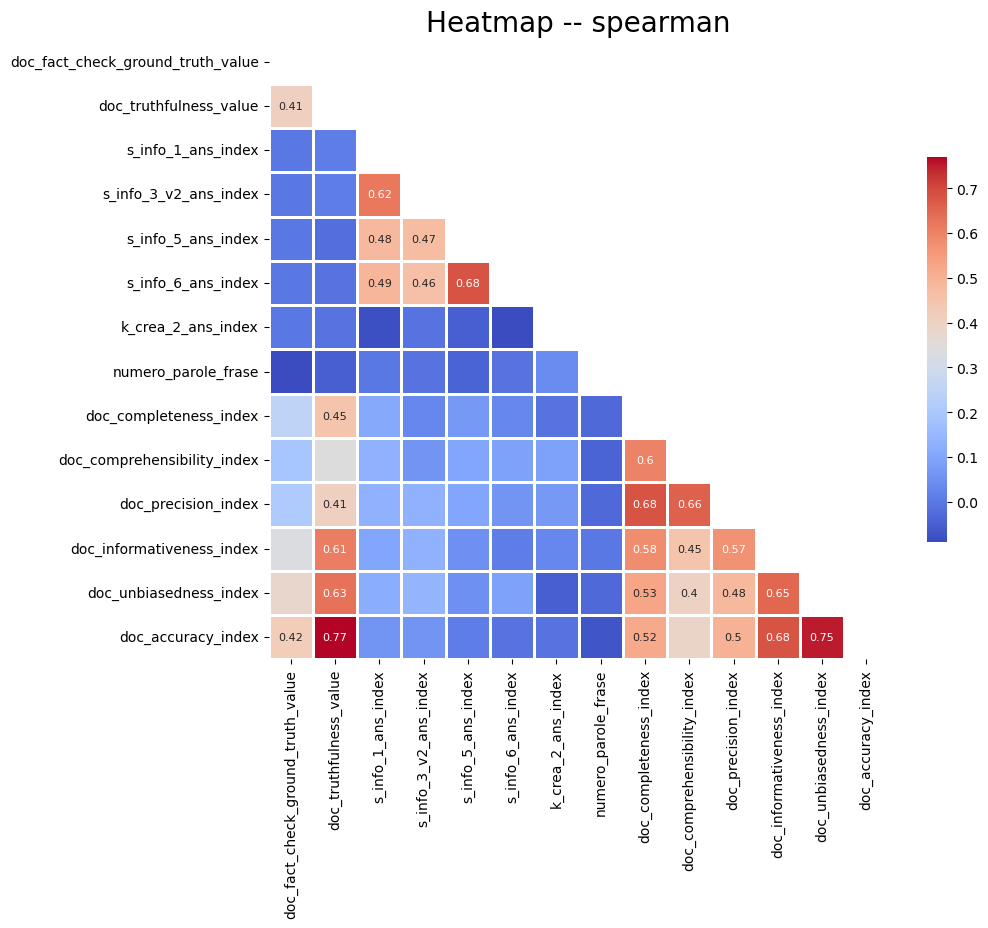

In [20]:
for metodo in metodi:
    crea_heatmap(df,metodo,0.5)


In [21]:
#df.to_csv(index=False, path_or_buf = "Datasets/df_final.csv")